# Exploratory Data Analysis and Feature Engineering

This notebook includes the exploratory data analysis followed by feature engineering the available patient data (`Clinical_Sepsis_data`) which includes a patient's vitals, lab results and demographics at a given time. 

**Note: The notebook carries out some memory intensive operations causing the kernel to die if the cluster does not have enough memory. This notebook is optional but the steps with documentation for feature engineering can be used or replicated by data scientists working on similar datasets.**

**Note** : Change to the custom environment "Default-Python-3.5-2CPU4GB". If aforementioned environment does not exist, create a new custom environment using these specifications:  (2 vCPU, 4GB RAM)
*Noted September 15, 2021*.

## Step I:  Exploratory Data Analysis
The analysis helps in summarizing main characteristics of the dataset with visual methods. The goal of exploratory data analysis is to obtain confidence in the data to a point where it is ready to be engaged in a machine learning algorithm. Another side benefit of EDA (exploratory data analysis) is to refine the selection of feature variables that will be used later for training machine learning model(s).

#### Install and import the required libraries 

In [1]:
!pip install missingno

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import os
from project_lib import Project

# Display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#Project-lib
project = Project.access()

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Read the data
For this project, the `Clinical-Sepsis-data.csv` file will be used.

In [3]:
# When running on Cloud click the option "Insert project token" - if not running on cloud project is setup below
try:
    project
except NameError:
    # READING AND WRITING PROJECT ASSETS
    import project_lib
    project = project_lib.Project()

In [4]:
#load the patient data
df = pd.read_csv(project.get_file('Clinical_Sepsis_data.csv'))

In [5]:
df.head()

,ID,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,p014977,80.0,100.0,36.50,121.00,58.0,41.00,13.5,NaN,1.0,25.0,1.0,7.40,47.0,77.0,NaN,53.0,NaN,NaN,111.0,2.1,NaN,107.0,2.4,NaN,NaN,3.7,NaN,NaN,27.9,8.8,38.1,9.9,223.0,160.0,77.27,1,0.0,1.0,-69.14,3,0
1,p014977,76.0,100.0,36.25,113.25,61.0,41.50,12.0,NaN,1.0,25.0,0.5,7.40,NaN,NaN,NaN,53.0,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.9,8.8,NaN,9.9,NaN,NaN,77.27,1,0.0,1.0,-69.14,4,0
2,p014977,80.0,100.0,36.25,132.75,71.5,46.25,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.27,1,0.0,1.0,-69.14,5,0
3,p014977,78.0,100.0,36.10,103.50,58.0,43.00,12.0,NaN,-3.0,NaN,NaN,7.34,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.5,NaN,NaN,NaN,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.27,1,0.0,1.0,-69.14,6,0
4,p014977,74.0,100.0,36.00,128.75,69.5,44.50,12.5,NaN,-3.0,NaN,NaN,7.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.27,1,0.0,1.0,-69.14,7,0


In [6]:
df.shape

(1552210, 42)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 42 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   ID                1552210 non-null  object 
 1   HR                1398811 non-null  float64
 2   O2Sat             1349474 non-null  float64
 3   Temp              525226 non-null   float64
 4   SBP               1325945 non-null  float64
 5   MAP               1358940 non-null  float64
 6   DBP               1065656 non-null  float64
 7   Resp              1313875 non-null  float64
 8   EtCO2             57636 non-null    float64
 9   BaseExcess        84145 non-null    float64
 10  HCO3              65028 non-null    float64
 11  FiO2              129365 non-null   float64
 12  pH                107573 non-null   float64
 13  PaCO2             86301 non-null    float64
 14  SaO2              53561 non-null    float64
 15  AST               25183 non-null    float64
 16  

#### Check for missing values
When a dataset is imported from a CSV file, many blank columns are imported as null values into the data frame which can later create problems while operating that data frame. These missing records should be either deleted or imputed in the data preprocessing stage which is covered in the next steps.

In [8]:
df.isna().sum().sort_values(ascending = False)

Bilirubin_direct    1549220
Fibrinogen          1541968
TroponinI           1537429
Bilirubin_total     1529069
Alkalinephos        1527269
AST                 1527027
Lactate             1510764
PTT                 1506511
SaO2                1498649
EtCO2               1494574
Phosphate           1489909
HCO3                1487182
Chloride            1481744
BaseExcess          1468065
PaCO2               1465909
Calcium             1460879
Platelets           1460001
Creatinine          1457594
Magnesium           1454259
WBC                 1452763
BUN                 1445642
pH                  1444637
Hgb                 1437619
FiO2                1422845
Hct                 1414777
Potassium           1407685
Glucose             1286694
Temp                1026984
Unit1                611960
Unit2                611960
DBP                  486554
Resp                 238335
SBP                  226265
O2Sat                202736
MAP                  193270
HR                  

Percentage of missing values

In [9]:
cnt = 1
for col in df.columns:
    if (df[col].isnull().sum() / df.shape[0]) > .50:
        print(cnt, '.',str(col), "Null %:",int(17-len(col)) * ' ', df[col].isnull().sum() / df.shape[0])
        print('---------')
        cnt += 1

1 . Temp Null %:               0.6616269705774348
---------
2 . EtCO2 Null %:              0.9628684263082959
---------
3 . BaseExcess Null %:         0.9457901959142127
---------
4 . HCO3 Null %:               0.9581061840859162
---------
5 . FiO2 Null %:               0.9166575398947308
---------
6 . pH Null %:                 0.9306968773555124
---------
7 . PaCO2 Null %:              0.9444012085993518
---------
8 . SaO2 Null %:               0.9654937154122187
---------
9 . AST Null %:                0.9837760354591196
---------
10 . BUN Null %:                0.931344341294026
---------
11 . Alkalinephos Null %:       0.9839319421985427
---------
12 . Calcium Null %:            0.9411606676931601
---------
13 . Chloride Null %:           0.9546027921479696
---------
14 . Creatinine Null %:         0.9390443303418996
---------
15 . Bilirubin_direct Null %:   0.9980737142525818
---------
16 . Glucose Null %:            0.8289432486583646
---------
17 . Lactate Null %:            0.

##### Understanding the nature of missingness
Using the plot of `missingno` (library for plotting missing values), the missing values located in each column and any correlations between missing values of different columns can be visualized.

<AxesSubplot:>

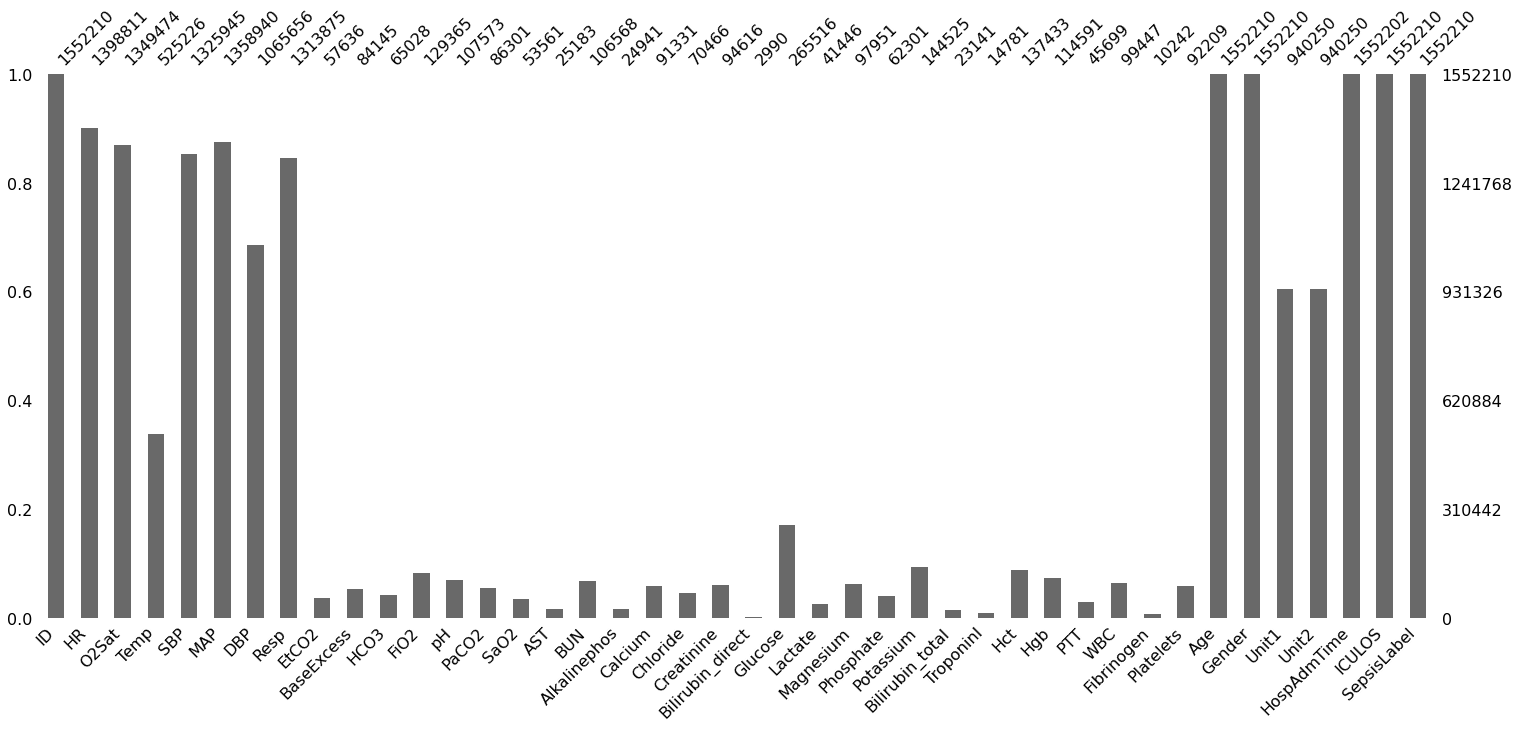

In [10]:
msno.bar(df)

To interpret this graph, read it from a top-down perspective. In this specific example it can be seen that clusters were generated based on what is defined as "test groups".

For example:

The attributes Hct, Hgb, WBC, platelets are often tested together in a test known as Complete Blood Count.

BaseExcess, pH, Lactate, Fi02, PaC02, Sa02 are given when  an ABG (or Arterial Blood Gas) is ordered. ABG is a blood test that measures the acidity, or pH, and the levels of oxygen (O2) and carbon dioxide (CO2) from an artery.

Liver Function Test (LFTs) are groups of blood tests that provide information about the state of a patient's liver. The test includes AST/ALT, Alkaline Phospho, Albumin, Bilirubin (direct, indirect, and total), prothrombin time (PT/INR), activated Partial Thromboplastin Time (aPTT) and Fibrinogen. EtC03 is typically measured in patients on a ventilator.Troponin Enzyme is a bio-marker released when the heart is damaged. It is checked a heart attack is suspected.

Patients who have data points in these test groups only do so because they presented certain symptoms which led to the test being administered. It is not necessarily suggestive of whether or not patients with missing values didn't have comparable numbers for those same data points.The technique here is to avoid dropping these columns by feature engineering them as their own test group and assgin patients 1 or 0 depending on whether they were given the test or not.

In [11]:
df_new = df[df['ID']=='p014977']
df_new.tail(10)

,ID,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
45,p014977,93.0,95.0,NaN,127.0,73.0,50.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.27,1,0.0,1.0,-69.14,48,0
46,p014977,104.0,95.0,37.3,153.0,89.0,58.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.27,1,0.0,1.0,-69.14,49,0
47,p014977,105.0,94.0,37.2,161.0,81.0,51.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.27,1,0.0,1.0,-69.14,50,0
48,p014977,104.0,94.0,37.2,160.0,81.0,50.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.27,1,0.0,1.0,-69.14,51,0
49,p014977,89.0,97.0,37.0,149.0,75.0,47.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.6,NaN,NaN,NaN,NaN,NaN,77.27,1,0.0,1.0,-69.14,52,0
50,p014977,84.0,95.0,NaN,128.0,75.0,48.0,23.0,NaN,2.0,NaN,NaN,7.43,40.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.0,NaN,NaN,NaN,4.9,NaN,NaN,26.6,NaN,NaN,NaN,NaN,NaN,77.27,1,0.0,1.0,-69.14,53,0
51,p014977,91.0,92.0,37.2,129.0,74.0,47.0,20.0,NaN,2.0,NaN,NaN,7.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.27,1,0.0,1.0,-69.14,54,0
52,p014977,83.0,98.0,NaN,130.0,76.0,49.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.27,1,0.0,1.0,-69.14,55,0
53,p014977,94.0,95.0,NaN,145.0,85.0,52.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.27,1,0.0,1.0,-69.14,56,0
54,p014977,94.0,97.0,NaN,130.0,73.0,43.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.27,1,0.0,1.0,-69.14,57,0


#### A heatmap to look at correlations
It is important to check for multi-collinearity among features when doing feature engineering. The presence of collinear features detracts from the impact of those features. When dealing with highly collinear features, one of them should be removed.

<function matplotlib.pyplot.show(close=None, block=None)>

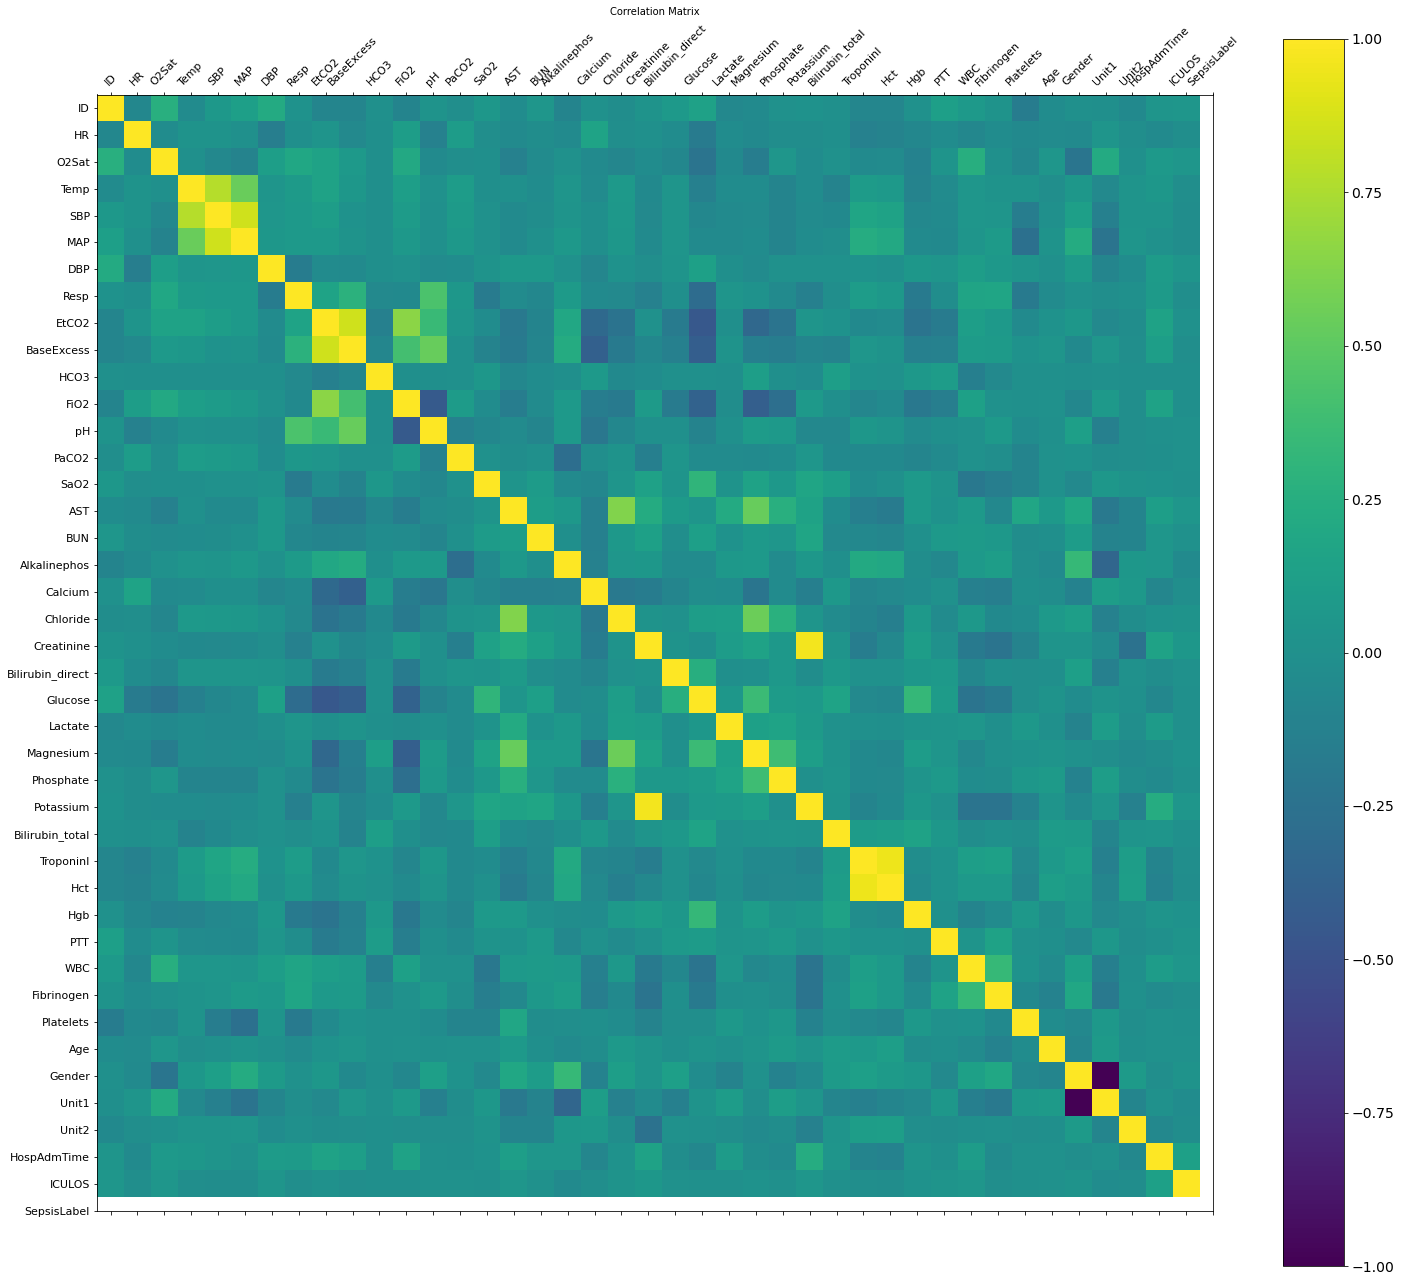

In [12]:
f = plt.figure(figsize=(25,22))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=11, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=11)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=10)
plt.show

#### Information about the dataset 
The following cells help in further understanding the nature of the data by performing some operations like counting unique patients. Each cell answers a specific question about the data.


In [13]:
df.ID.nunique()

40336

How often are patients labeled both sepsis and non-sepsis? <br>

In [14]:
(df.groupby('ID')['SepsisLabel'].nunique() > 1).sum() / df['ID'].nunique()
#It happens in 6.2% of patients

0.06212812376041253

How often do patients come in? Represented as a range.

In [15]:
print("min - max:",df['ID'].value_counts().min(), "-", df['ID'].value_counts().max())

min - max: 8 - 336


How many rows of data do these patients encompass?

In [16]:
df['had_sepsis'] = df.groupby('ID')['SepsisLabel'].transform('max')
df['had_sepsis'].value_counts(normalize=True)
# 11% of the data is composed of customers that had sepsis at some point in time

0    0.888926
1    0.111074
Name: had_sepsis, dtype: float64

Of the patients that have multiple sepsis labels, what % of them time are they labeled sepsis?

In [17]:
df_sepsis = df[df['had_sepsis'] == 1]
df_sepsis['SepsisLabel'].value_counts(normalize=True)

# All patients in the dataframe below had sepsis at some point

0    0.838084
1    0.161916
Name: SepsisLabel, dtype: float64

Of the patients that had sepsis, what's their breakdown by age?

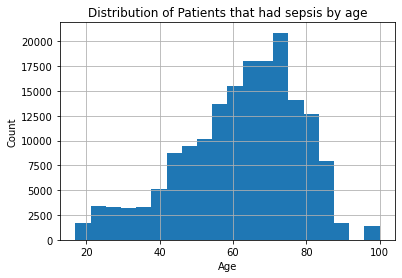

In [18]:
df_sepsis['Age'].hist(bins=20)
plt.title('Distribution of Patients that had sepsis by age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### Check for outliers
An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. The following steps examine the data for unusual observations that are far removed from the mass of data. This helps in deciding whether the outlier data should be removed from the dataset for training the machine learning model.

In [19]:
perc_null = pd.DataFrame(df.isnull().sum()/df.shape[0]).reset_index()
perc_null.columns = ['Column', 'PercNull']
perc_null = perc_null.sort_values(by = 'PercNull', ascending = False).reset_index(drop=True)
perc_null.head()

,Column,PercNull
0,Bilirubin_direct,0.998074
1,Fibrinogen,0.993402
2,TroponinI,0.990477
3,Bilirubin_total,0.985092
4,Alkalinephos,0.983932


In [20]:
drop_col = np.array(perc_null[perc_null.PercNull>=0.95].Column)
drop_col = np.append(drop_col, ['Unit1', 'Unit2'])
drop_col
data = df.drop(drop_col, axis = 1)
sepsisPos = data[data.SepsisLabel==1]
Outliers = np.zeros(23)
for i, col in enumerate(sepsisPos.columns[1:23]):
    mu = sepsisPos[col].mean()
    s = sepsisPos[col].std()
    
    _filter = ((sepsisPos[col] > mu+3*s) | (sepsisPos[col] < mu-3*s))
    
    Outliers[i] = sepsisPos[_filter].shape[0]
outlierPerc = pd.DataFrame(sepsisPos.columns[1:23])
outlierPerc.columns = ['Column']
outlierPerc['Outliers'] = pd.DataFrame(Outliers)
outlierPerc['PercOutliers'] = 100*outlierPerc['Outliers']/sepsisPos.shape[0]
outlierPerc
# The table defines the number and percentage of outliers in the specific columns 

,Column,Outliers,PercOutliers
0,HR,74.0,0.265081
1,O2Sat,300.0,1.074653
2,Temp,120.0,0.429861
3,SBP,133.0,0.476429
4,MAP,172.0,0.616134
5,DBP,145.0,0.519415
6,Resp,228.0,0.816736
7,BaseExcess,23.0,0.082390
8,FiO2,4.0,0.014329
9,pH,45.0,0.161198


Boxplots showing outliers


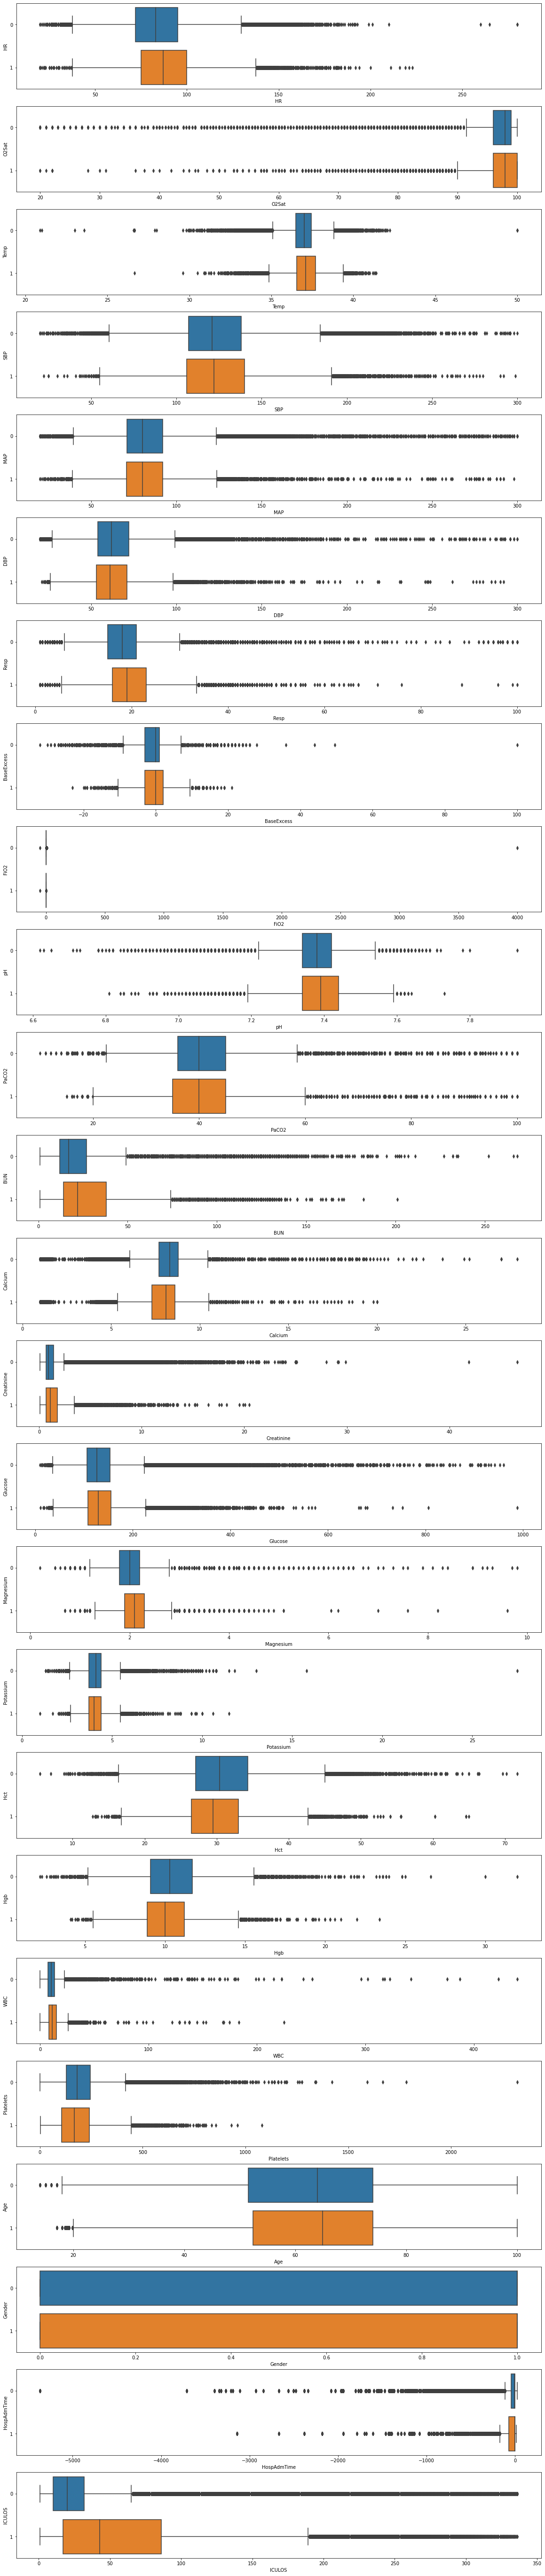

In [21]:
f,ax = plt.subplots(len(data.columns[1:26]),1, figsize=(20,100))

for i, column in enumerate(data.columns[1:26]):
    sns.boxplot(x=column, y='had_sepsis', data = data, ax=ax[i], orient = 'h').set(ylabel = column)

#### Class balance
The data consists of two classes: sepsis (labelled as `1`) and non-sepsis (labellel as `0`). This step provides an insight to the balance between these classes.

In [22]:
df['SepsisLabel'].value_counts(normalize=True)
#The data is highly imbalanced with 98% of the non-sepsis encounters

0    0.982015
1    0.017985
Name: SepsisLabel, dtype: float64

## STEP II:  Feature Engineering
The steps below illustrate detailed feature engineering specially dealing with the data imbalance and missing values studied in the exploratory data analysis.  From the nature of missingness explained above, new features based on the test groups are created. 

##### NOTE: 
*If your cluster is small and you run into memory issues causing the kernel to die, skip all the cells below and use the provided feature_engineered_ds.csv in subsequent notebooks*

### Creating new features 
Based on the analysis done to understand the nature of missing data, new grouped features are created, identified from the graph for missingness (refer to the section above on *Understanding the nature of missingness*)

#### Build a "Complete_blood_test" feature
This feature is positive if the patient receives either a Hct, Hgb, WBC or Platelets test

In [23]:
# Define blood test columns
blood_test_cols = ["Hct","Hgb","WBC","Platelets"]

In [24]:
# Create a boolean column that is 1 if any of the complete blood test columns are non NULL, otherwise 0
df["complete_blood_test_fe"] = np.where(df[blood_test_cols].any(axis='columns'),1,0)

In [25]:
# 10% of patients (who had sepsis) had a blood test taken
df['complete_blood_test_fe'].value_counts(normalize=True)

0    0.909178
1    0.090822
Name: complete_blood_test_fe, dtype: float64

#### Build a "ABG_test" feature 
This feature is positive if the patient receives a BaseExcess, pH, Lactate, Fi02, PaC02, or Sa02 test.

In [26]:
# Define ABG test columns
abg_test_cols = ["BaseExcess","pH","Lactate","FiO2","PaCO2","SaO2"]

In [27]:
# Create boolean column that is 1 if any of the abg blood test columns are non NULL, otherwise 0
df["abg_blood_test_fe"] = np.where(df[abg_test_cols].any(axis='columns'),1,0)

In [28]:
# Of the patients who had sepsis, roughly 23% took an ABG blood test
df['abg_blood_test_fe'].value_counts(normalize=True)

0    0.877457
1    0.122543
Name: abg_blood_test_fe, dtype: float64

#### Build a BMP_test" feature. 
This feature is positive if the patient receives a Sodium, Potassium, Chloride, HC03, BUN, Creatine, or Glucose tests. Apparently, all patients receive this test, if that is the case then this won't qualify for a new feature

In [29]:
# Define BMP test columns
bmp_test_cols = ["Potassium","Chloride","HCO3","BUN","Creatinine","Glucose"]

In [30]:
# Create boolean column that is 1 if any of the BMP blood test columns are non NULL, otherwise 0
df["bmp_test_fe"] = np.where(df[bmp_test_cols].any(axis='columns'),1,0)

In [31]:
# Of the patients who had sepsis, roughly 20% took an BMP blood test
df['bmp_test_fe'].value_counts(normalize=True)

0    0.811135
1    0.188865
Name: bmp_test_fe, dtype: float64

#### Build a "Liver_function_test" feature
This feature is positive if the patient receives a AST/ALT, Alkaline Phospho, Albumin, Bilirubin, PTT, or Fibrinogen tests

In [32]:
# Define liver_function test columns
liver_function_test_cols = ["AST","Alkalinephos","Bilirubin_direct","Bilirubin_total","PTT","Fibrinogen"]

In [33]:
# Create boolean column that is 1 if any of the liver_function test columns are non NULL, otherwise 0
df["liver_function_test_fe"] = np.where(df[liver_function_test_cols].any(axis='columns'),1,0)

In [34]:
# Of the patients who had sepsis, roughly 5% took a liver function test
df['liver_function_test_fe'].value_counts(normalize=True)

0    0.959631
1    0.040369
Name: liver_function_test_fe, dtype: float64

In [35]:
# It seems roughly 11% of patients are on ventilators, and this will be used to create a new feature
df['EtCO2'].isnull().sum()/df.shape[0]

0.9628684263082959

In [36]:
# Create boolean column that is 1 if EtC02 is not NULL, otherwise 0
df["on_ventilator_fe"] = np.where(df['EtCO2'].notnull(),1,0)

In [37]:
# It seems roughly 1% of patients were suspected of having heart attacks
df['TroponinI'].isnull().sum()/df.shape[0]

0.9904774482834152

#### Build a feature for heart rate change: 
This feature will indicate how much heart rate increased or decreased since the previous hour


In [38]:
# How many HR fields are null?
df['HR'].isnull().sum()/df.shape[0]

0.09882618975525219

In [39]:
# Foward fill HR values so we use the last available value
df['HR_fe'] = df.groupby('ID')['HR'].transform(lambda x: x.ffill())

In [40]:
df['HR_fe'].isnull().sum()/df.shape[0]

0.022842914296390307

In [41]:
# For the remaining NULL HR_fe values backfill is used 
df['HR_fe'] = df.groupby('ID')['HR_fe'].transform(lambda x: x.bfill())

In [42]:
# We should no longer have NULL HR_fe values unless there are patients who never had HR taken at all
df['HR_fe'].isnull().sum()/df.shape[0]

9.148246693424214e-05

In [43]:
# Create a column for previous HR so we can compare to current HR
df['HR_prev'] = df.groupby('ID')['HR_fe'].shift(1)

In [44]:
# Every first HR_previous will be NULL, so fill those values with the current HR (so that upon subtraction there will be no difference)
df['HR_prev'] = np.where(df['HR_prev'].isnull(), df['HR_fe'],df['HR_prev'])

In [45]:
# Subtract the previous HR from the current HR to get change in HR
df['HR_delta_fe'] = df['HR_fe'] - df['HR_prev']

In [46]:
# Drop the HR_prev column
df = df.drop('HR_prev',axis=1)

In [47]:
# Drop HR because a new feature has been created for it
df = df.drop("HR",axis=1)

Drop all rows after the patient is predicted to have sepsis. 
It will cut noise but will contribute to the problem of imbalanced classes which is dealt with later.

In [48]:
# Create a culumative sum sepsis label
df['Sepsis_cumsum'] = df.groupby('ID')['SepsisLabel'].transform(lambda x: x.cumsum())

In [49]:
# The balance of the sepsis label if we remove all rows after first instance of positive label?
print("Orgininal Dataframe Sepsis Label balance:")
print(df['SepsisLabel'].value_counts(normalize=True))
print('--------------')
print("Removing all rows after initial diagnosis balance:")
print(df[df['Sepsis_cumsum'] < 2]['SepsisLabel'].value_counts(normalize=True))

Orgininal Dataframe Sepsis Label balance:
0    0.982015
1    0.017985
Name: SepsisLabel, dtype: float64
--------------
Removing all rows after initial diagnosis balance:
0    0.99808
1    0.00192
Name: SepsisLabel, dtype: float64



After creating new features till now, many of the previous columns have redundant information and can be removed for data consistency. Columns exhibiting high proportions of null values even after imputations are dropped as well.

In [50]:
# Drop columns if more than 70% values are NULL
cnt = 1
dropped_cols = []
for col in df.columns:
    if (df[col].isnull().sum() / df.shape[0]) > .70:
        dropped_cols.append(str(col))
        df = df.drop(col,axis=1)
        cnt += 1
print("Dropped {} columns. New dataframe shape is {}".format(cnt,df.shape))
print("Columns dropped:",dropped_cols)

Dropped 28 columns. New dataframe shape is (1552210, 23)
Columns dropped: ['EtCO2', 'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct', 'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium', 'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC', 'Fibrinogen', 'Platelets']


In [51]:
# Of the remaining columns, what do the NULL percentages look like?
cnt = 1
for col in df.columns:
    print(cnt, '.',str(col), "Null %:",int(17-len(col)) * ' ', df[col].isnull().sum() / df.shape[0])
    print('---------')
    cnt += 1

1 . ID Null %:                 0.0
---------
2 . O2Sat Null %:              0.13061119307310223
---------
3 . Temp Null %:               0.6616269705774348
---------
4 . SBP Null %:                0.1457695801470162
---------
5 . MAP Null %:                0.12451279143930268
---------
6 . DBP Null %:                0.3134588747656567
---------
7 . Resp Null %:               0.15354558983642677
---------
8 . Age Null %:                0.0
---------
9 . Gender Null %:             0.0
---------
10 . Unit1 Null %:              0.3942507779230903
---------
11 . Unit2 Null %:              0.3942507779230903
---------
12 . HospAdmTime Null %:        5.153941799112233e-06
---------
13 . ICULOS Null %:             0.0
---------
14 . SepsisLabel Null %:        0.0
---------
15 . had_sepsis Null %:         0.0
---------
16 . complete_blood_test_fe Null %:  0.0
---------
17 . abg_blood_test_fe Null %:  0.0
---------
18 . bmp_test_fe Null %:        0.0
---------
19 . liver_function_test_fe Null %:

Build a feature for temperature using the change in temperature column

In [52]:
# Foward fill temperature so the last known value is used 
df['Temp_fe'] = df.groupby('ID')['Temp'].transform(lambda x: x.ffill())
# For the remaining values, use the mean temperatures
df['Temp_fe'] = np.where(df['Temp_fe'].isnull(), df.groupby('ID')['Temp_fe'].transform('mean'),df['Temp_fe'])
df['Temp_fe'] = np.where(df['Temp_fe'].isnull(), df.groupby('Age')['Temp_fe'].transform('mean'),df['Temp_fe'])
df['Temp_fe'] = np.where(df['Temp_fe'].isnull(), df['Temp_fe'].mean(),df['Temp_fe'])

In [53]:
# Create a column for previous temperature so it can be compared to current temperature
df['Temp_prev'] = df.groupby('ID')['Temp_fe'].shift(1)

In [54]:
# Every first 'Temp_previous' (previous temperature) will be NULL, so fill those values with the current temperature
df['Temp_prev'] = np.where(df['Temp_prev'].isnull(), df['Temp_fe'],df['Temp_prev'])

In [55]:
# Subtract the previous Temp from the current Temp to get the delta (the new feature is named as 'delta-feature_name')
df['Temp_delta_fe'] = df['Temp_fe'] - df['Temp_prev']

In [56]:
# Drop the Temp_prev column
df = df.drop('Temp_prev',axis=1)

In [57]:
# Drop Temp column since a new feature has been created for it
df = df.drop('Temp',axis=1)

Impute values for SBP,  MAP and DBP <br>

These three columns represent blood pressure values and are related by an established relation. This relationsip between SBP, MAP and DBP is defined as follows: <br> 
- MAP = (1/3 * SBP) + (2/3 * DBP) <br>

Using this relation, a compound feature representing blood pressure is created to replace three different columns.

In [58]:
# Impute MAP
df['MAP_fe'] = np.where(df['MAP'].isnull(), (1/3 * df['SBP']) + (2/3 * df['DBP']),df['MAP'])
# Impute SBP
df['SBP_fe'] = np.where(df['SBP'].isnull(), (3 * df["MAP"]) - (2/3 * df['DBP']),df['SBP'])
# Impute DBP
df['DBP_fe'] = np.where(df['DBP'].isnull(), (3/2 * df['MAP']) - (1/3 * df['SBP']),df['DBP'])

In [59]:
# Run the above again but now use imputed values 
# Impute MAP
df['MAP_fe'] = np.where(df['MAP_fe'].isnull(), (1/3 * df['SBP_fe']) + (2/3 * df['DBP_fe']),df['MAP_fe'])
# Impute SBP
df['SBP_fe'] = np.where(df['SBP_fe'].isnull(), (3 * df["MAP_fe"]) - (2/3 * df['DBP_fe']),df['SBP_fe'])
# Impute DBP
df['DBP_fe'] = np.where(df['DBP_fe'].isnull(), (3/2 * df['MAP_fe']) - (1/3 * df['SBP_fe']),df['DBP_fe'])

In [60]:
# Foward fill the rest
df['MAP_fe'] = df.groupby('ID')['MAP_fe'].transform(lambda x: x.ffill())
# SBP
df['SBP_fe'] = df.groupby('ID')['SBP_fe'].transform(lambda x: x.ffill())
# DBP
df['DBP_fe'] = df.groupby('ID')['DBP_fe'].transform(lambda x: x.ffill())

In [61]:
# Back fill for the remaining 1%-5% NULL 
df['MAP_fe'] = df.groupby('ID')['MAP_fe'].transform(lambda x: x.bfill())
# SBP
df['SBP_fe'] = df.groupby('ID')['SBP_fe'].transform(lambda x: x.bfill())
# DBP
df['DBP_fe'] = df.groupby('ID')['DBP_fe'].transform(lambda x: x.bfill())

In [62]:
# Drop SBP and DBP(MAP should contain the sum of their parts)
drop_cols = ['SBP','MAP','DBP','SBP_fe','DBP_fe']
df = df.drop(drop_cols,axis=1)

Creating a new feature for hospital administrative identifiers (Unit1 and Unit2 columns in the dataset)

In [63]:
# Create an unknown_unit feature so that Unit 1 or 2 will not be dropped
# Create boolean column that is 1 if either Unit1 or Unit2 are filled, otherwise 0
unit_cols = ['Unit1','Unit2']
df["Unit_unknown_fe"] = np.where(df[unit_cols].any(axis='columns'),0,1)

In [64]:
# Fill Unit NULL value with 0's
df[unit_cols] = df[unit_cols].fillna(0)

Imputing oxygen saturation (O2Sat) to deal with the missing values

In [65]:
# Foward fill O2Sat so that the last known value is used
df['O2Sat_fe'] = df.groupby('ID')['O2Sat'].transform(lambda x: x.ffill())
# For the remaining values, use the mean oxygen saturation (O2Sat)  
df['O2Sat_fe'] = np.where(df['O2Sat_fe'].isnull(), df.groupby('ID')['O2Sat_fe'].transform('mean'),df['O2Sat_fe'])
df['O2Sat_fe'] = np.where(df['O2Sat_fe'].isnull(), df.groupby('Age')['O2Sat_fe'].transform('mean'),df['O2Sat_fe'])
df['O2Sat_fe'] = np.where(df['O2Sat_fe'].isnull(), df['O2Sat_fe'].mean(),df['O2Sat_fe'])

Build a feature for oxygen saturation (O2Sat) using a change in 'O2Sat' column 


In [66]:
# Create a column for previous O2Sat so that it can be compared to current O2Sat
df['O2Sat_prev'] = df.groupby('ID')['O2Sat_fe'].shift(1)

In [67]:
# Every first 'O2Sat_previous' will be NULL, so fill those values with the current O2Sat 
df['O2Sat_prev'] = np.where(df['O2Sat_prev'].isnull(), df['O2Sat_fe'],df['O2Sat_prev'])

In [68]:
# Subtract the previous O2Sat from the current O2Sat to get the delta (new feature is named as 'delta-feature-name')
df['O2Sat_delta_fe'] = df['O2Sat_fe'] - df['O2Sat_prev']

In [69]:
# Drop the O2Sat_prev column
df = df.drop('O2Sat_prev',axis=1)

In [70]:
# Drop O2Sat column since a new feature has been created for it
df = df.drop('O2Sat',axis=1)

Build a feature using the change in respiration rate (Resp) column and fill the missing values

In [71]:
# Foward fill Resp so the last known value is used
df['Resp_fe'] = df.groupby('ID')['Resp'].transform(lambda x: x.ffill())
# For the remaining values, use the mean 
df['Resp_fe'] = np.where(df['Resp_fe'].isnull(), df.groupby('ID')['Resp_fe'].transform('mean'),df['Resp_fe'])
df['Resp_fe'] = np.where(df['Resp_fe'].isnull(), df.groupby('Age')['Resp_fe'].transform('mean'),df['Resp_fe'])
df['Resp_fe'] = np.where(df['Resp_fe'].isnull(), df['Resp_fe'].mean(),df['Resp_fe'])

In [72]:
# Create a column for previous 'Resp' so that it can be compared to current O2Sat
df['Resp_prev'] = df.groupby('ID')['Resp_fe'].shift(1)

In [73]:
# Every first Resp_previous will be NULL, so fill those values with the current 'Resp' 
df['Resp_prev'] = np.where(df['Resp_prev'].isnull(), df['Resp_fe'],df['Resp_prev'])

In [74]:
# Subtract the previous Resp from the current Resp to get the delta (new feature is named as delta-feature-name)
df['Resp_delta_fe'] = df['Resp_fe'] - df['Resp_prev']

In [75]:
# Drop the Resp_prev column
df = df.drop('Resp_prev',axis=1)

In [76]:
# Drop Resp column since a new feature has been created for it
df = df.drop('Resp',axis=1)

All new features have been created. The dataset is reduced using filtering on the cumulative number of sepsis encounters (created in the beginning) to help class imbalance.

In [77]:
# Create a reduced dataframe 
df_reduced = df[df['Sepsis_cumsum'] < 2]
# Drop Sepsis_cumsum column
df_reduced = df_reduced.drop('Sepsis_cumsum',axis=1)

In [78]:
# Label balance
df_reduced['SepsisLabel'].value_counts(normalize=True)

0    0.99808
1    0.00192
Name: SepsisLabel, dtype: float64

In [79]:
df_reduced = df_reduced.sort_values(['ID','ICULOS'])

#### Save the feature engineered dataset to Data Assets

In [80]:
project.save_data("feature_engineered_ds.csv", df_reduced.to_csv(index=False))

An asset named 'feature_engineered_ds.csv' already exists.

2022-06-01 08:36:51,440 - __PROJECT_LIB__ - ERROR - An asset named 'feature_engineered_ds.csv' already exists.
RuntimeError: An asset named 'feature_engineered_ds.csv' already exists.


RuntimeError: An asset named 'feature_engineered_ds.csv' already exists.

### Developed by:
__Gregory Klose, Data Scientist, Cloud Pak Acceleration Team <br>
Ikenna Precious Chima, Data Scientist, Cloud Pak Acceleration Team <br>
Meenakshi Kodati, Data Scientist, Cloud Pak Acceleration Team__


__Sample Materials, provided under license.<br>
Licensed Materials - Property of IBM.<br>
© Copyright IBM Corp. 2020. All Rights Reserved. <br>
US Government Users Restricted Rights - Use, duplication or disclosure restricted by GSA ADP Schedule Contract with IBM Corp.__